In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np


def leaflet_plot_stations(binsize, hashid):

    #df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    df = pd.read_csv('BinSize_d18.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(18,'a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9')

ModuleNotFoundError: No module named 'mplleaflet'

In [6]:
import pandas as pd

df = pd.read_csv('a3fe47a453b0958158013a76033720a622264c58ab835c82a7eb95b9.csv')


df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-Date'] != '02-29']
df.head()

t_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
t_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})
t_min.head()

t_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})
t_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})

broken_min = np.where(t_min_15['Data_Value'] < t_min['Data_Value'])[0]
broken_max = np.where(t_max_15['Data_Value'] > t_max['Data_Value'])[0]


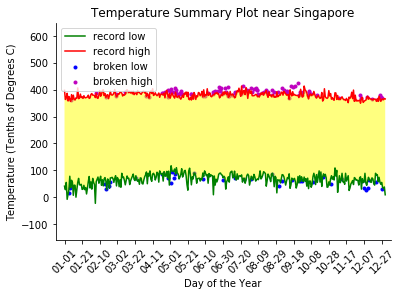

In [11]:
plt.figure()
plt.plot(t_min.values, 'g', label = 'record low')
plt.plot(t_max.values, 'r', label = 'record high')
plt.scatter(broken_min, t_min_15.iloc[broken_min], s = 9, c = 'b', label = 'broken low')
plt.scatter(broken_max, t_max_15.iloc[broken_max], s = 9, c = 'm', label = 'broken high')
plt.gca().axis([-10, 370, -160, 650])
plt.xticks(range(0, len(t_min), 20), t_min.index[range(0, len(t_min), 20)], rotation = '45')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary Plot near Singapore')
plt.legend(loc = 2, frameon = True)
plt.gca().fill_between(range(len(t_min)), t_min['Data_Value'], t_max['Data_Value'], facecolor = 'yellow', alpha = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
#axis([0, 800, 0, 1200])
#savefig("plotting-weather-patterns.png")
